In [1]:
import numpy as np
import EFIE as solve
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12

frequency = 1e6 * 146
omega, wavelength = 2 * np.pi * frequency, light_speed / frequency
incident_field, radius = 1, 3.175e-3
delta_r = wavelength / 1e2

class yagi:
    def __init__(self, position, angle, length, source_position, radius):
        self.position = position
        self.angle = angle
        self.length = length
        self.source_position = source_position
        self.radius = radius

structure_type = 'yagi-uda'
pos = np.array([[0.0, 0.0, 0.0]])
angle = np.array([[0.0, 0.0]])
lengths = np.array([wavelength/2])
source_position = np.array([[0.0, 0.0, 0.0, incident_field]])
radii = np.array([radius])
test = yagi(pos, angle, lengths, source_position, radii)

In [ ]:
from tqdm import tqdm
import time

dr = wavelength / np.linspace(50, 1000, 10)
I_pulse, I_triangle, E_pulse, E_triangle = np.zeros(len(dr), dtype=object), np.zeros(len(dr), dtype=object), np.zeros(len(dr), dtype=object), np.zeros(len(dr), dtype=object)
R_pulse, R_triangle = np.zeros(len(dr), dtype=object), np.zeros(len(dr), dtype=object)

time_cur_pulse, time_cur_triangle = [], []
time_e_pulse, time_e_triangle = [], []

for i in tqdm(range(len(dr))) :
    
    start = time.time()
    I_pulse[i], R_pulse[i] = solve.calc_current_amplitudes(structure_type=structure_type, basis_functions='pulse', antenna=test, frequency=frequency, delta_r=dr[i])
    time_cur_pulse.append(time.time() - start)
    
    start = time.time()
    E_pulse[i], angles = solve.calc_field_pattern(phi=0, theta=0, current=I_pulse[i], R=R_pulse[i], delta_r=dr[i], frequency=frequency)
    time_e_pulse.append(time.time() - start)
    
    start = time.time()
    I_triangle[i], R_triangle[i] = solve.calc_current_amplitudes(structure_type=structure_type, basis_functions='triangle', antenna=test, frequency=frequency, delta_r=dr[i])
    time_cur_triangle.append(time.time() - start)
    
    start = time.time()
    E_triangle[i], angles = solve.calc_field_pattern(phi=0, theta=0, current=I_triangle[i], R=R_triangle[i], delta_r=dr[i], frequency=frequency)
    time_e_triangle.append(time.time() - start)
    
time_cur_pulse, time_cur_triangle = np.array(time_cur_pulse), np.array(time_cur_triangle)
time_e_pulse, time_e_triangle = np.array(time_e_pulse), np.array(time_e_triangle)

In [ ]:
import matplotlib.pyplot as plt
E_max_pulse, E_max_triangle = np.zeros(len(E_pulse)), np.zeros(len(E_pulse))
for i in range(len(E_pulse)):
    E_max_pulse[i] = np.abs(1 - np.max(E_pulse[i])/np.max(E_pulse[-1]))
    E_max_triangle[i] = np.abs(1 - np.max(E_triangle[i])/np.max(E_triangle[-1]))
plt.plot(dr / wavelength, E_max_pulse, color = 'red', label = 'pulse')
plt.plot(dr / wavelength, E_max_triangle, color = 'green', label = 'triangle')
plt.xlabel("Spatial resolution, wavelength", size = 13)
plt.ylabel("1 - E/E_0", size = 13)
plt.title("Convergence using different basis functions", size = 14)
plt.xscale('log')
plt.grid(True)
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dr / wavelength, time_cur_pulse, color = 'red', label = 'current (pulse)')
plt.plot(dr / wavelength, time_cur_triangle, color = 'green', label = 'current (triangle)')
plt.plot(dr / wavelength, time_e_pulse, color = 'blue', label = 'field (pulse)')
plt.plot(dr / wavelength, time_e_triangle, color = 'orange', label = 'field (triangle)')
plt.xlabel("Spatial resolution, wavelength", size = 13)
plt.ylabel("Time, s", size = 13)
plt.title("Time for calculating", size = 14)
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()

In [2]:
delta_r = wavelength/1e2
cur_triangle, r_triangle = solve.calc_current_amplitudes(structure_type, 'triangle', test, frequency, delta_r)
field_triangle, angles = solve.calc_field_pattern(antenna=test,phi=0,theta=0,basis_functions='triangle', structure_type='yagi-uda',current=cur_triangle, R=r_triangle, delta_r=delta_r, frequency=frequency)

c:\Users\lukas\OneDrive\Документы\Method-of-moment-for-antennas\MyMomVenv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [5]:
delta_r = wavelength/5e2
cur_pulse, r_pulse = solve.calc_current_amplitudes(structure_type, 'pulse', test, frequency, delta_r)
field_pulse, angles = solve.calc_field_pattern(antenna=test,phi=0,theta=0,basis_functions='pulse', structure_type='yagi-uda',current=cur_pulse, R=r_pulse, delta_r=delta_r, frequency=frequency)

c:\Users\lukas\OneDrive\Документы\Method-of-moment-for-antennas\MyMomVenv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


0.006345664446375612 0.0060113661953489226


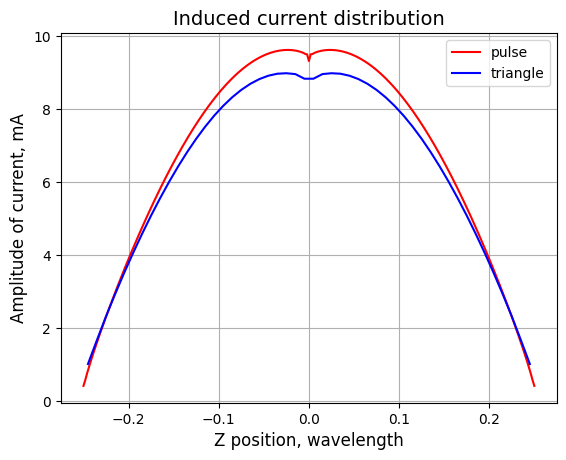

In [6]:
import matplotlib.pyplot as plt
plt.plot(r_pulse[:,2] / wavelength, np.abs(cur_pulse) * 1000, color = 'red', label = 'pulse')
plt.plot(r_triangle[:,2] / wavelength, np.abs(cur_triangle) * 1000, color = 'blue', label = 'triangle')
plt.title('Induced current distribution', size = 14)
plt.xlabel('Z position, wavelength', size = 12)
plt.ylabel('Amplitude of current, mA', size = 12)
plt.grid()
plt.legend()
print(field_pulse[0], field_triangle[0])

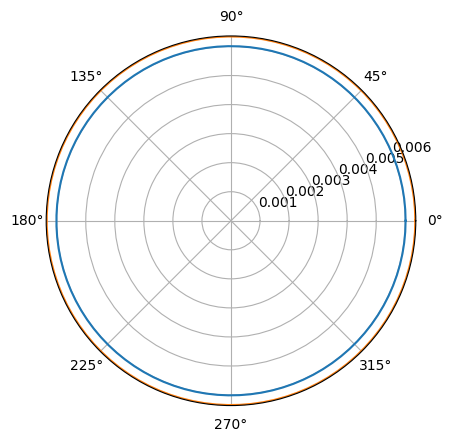

In [7]:
plt.polar(angles, field_triangle)
plt.polar(angles, field_pulse)

0.04942916923940665 0.04622894446507218


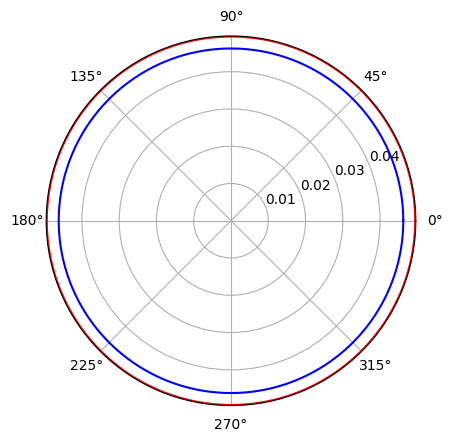

In [13]:
import matplotlib.pyplot as plt
plt.polar(angles, field_pulse, color = 'red')
plt.polar(angles, field_triangle, color = 'blue')
print(field_pulse[0], field_triangle[0])

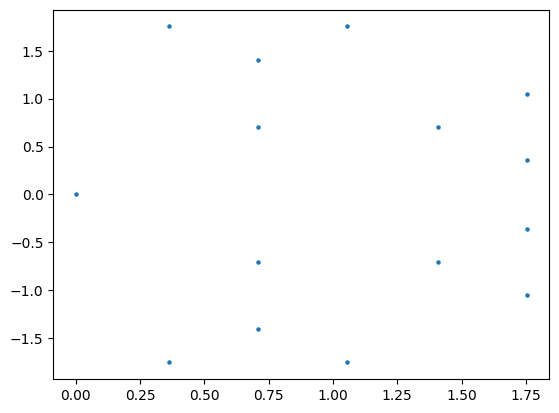

In [8]:
import numpy as np
#! This is a cell for generating random fractal planar graph

graph = []

dr = 1
pos_start = np.array([0.0, 0.0])

phi0 = np.pi/4

pos, ang = np.array([[0.0, 0.0]]), np.array([0.0])

its = 3
for i in range(its):
    for j in range(len(pos)):
        graph.append(pos[j])
    pos_new, ang_new = [], []
    for j in range(len(pos)):
        ang_new_j_1, ang_new_j_2 = ang[j] + phi0, ang[j] - phi0
        pos_new_j_1 = pos[j] + dr * np.array([np.cos(ang_new_j_1), np.sin(ang_new_j_1)])
        pos_new_j_2 = pos[j] + dr * np.array([np.cos(ang_new_j_2), np.sin(ang_new_j_2)])
        pos_new.append(pos_new_j_1)
        pos_new.append(pos_new_j_2)
        ang_new.append(ang_new_j_1)
        ang_new.append(ang_new_j_2)
    dr=dr*0.7
    pos = np.array(pos_new)
    ang = np.array(ang_new)
    
for j in range(len(pos)):
        graph.append(pos[j])
        
import matplotlib.pyplot as plt 
graph = np.array(graph)
plt.scatter(graph[:,0], graph[:, 1],s=5)